In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('quikr_car.csv')

In [4]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [6]:
df['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [7]:
df['year'] = df['year'].astype(str)
df = df[df['year'].str.match(r'^\d{4}$')]
df['year'] = df['year'].astype(int)

In [8]:
df['year'].unique()

array([2007, 2006, 2018, 2014, 2015, 2012, 2013, 2016, 2010, 2017, 2008,
       2011, 2019, 2009, 2005, 2000, 2003, 2004, 1995, 2002, 2001])

In [9]:
df['Price'].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

## Data Cleaning

In [10]:
df['Price'] = df['Price'].replace('[^0-9]', '', regex=True)

# Convert 'price' column to integer type
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Drop rows with NaN values (if any)
df = df.dropna(subset=['Price'])


In [11]:
df['kms_driven']=df['kms_driven'].replace('[^0-9]','',regex=True)
df['kms_driven']=pd.to_numeric(df['kms_driven'],errors='coerce')
mean_kms=df['kms_driven'].mean()
df['kms_driven'].fillna(mean_kms,inplace=True)
df['kms_driven']=df['kms_driven'].astype('int')

In [12]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [13]:
mode_fueltype=df['fuel_type'].mode()[0]
df['fuel_type'].fillna(mode_fueltype,inplace=True)

In [14]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'LPG'], dtype=object)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
top_5_companies=df['company'].value_counts().head(5)
top_5_df=pd.DataFrame({'company':top_5_companies.index,'count':top_5_companies.values})

In [17]:
top_5_df.head()

,company,count
0,Maruti,221
1,Hyundai,139
2,Mahindra,98
3,Tata,65
4,Honda,61


## EDA

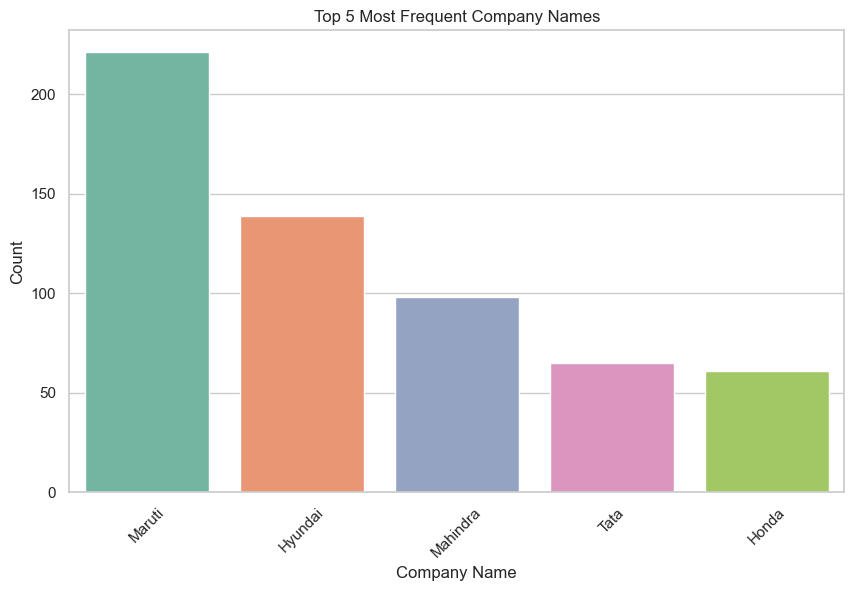

In [18]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x='company',y='count' ,data=top_5_df,palette='Set2')
plt.title('Top 5 Most Frequent Company Names')
plt.xlabel('Company Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [19]:
df['year'].value_counts()

year
2015    111
2014     94
2013     94
2012     75
2016     74
2011     59
2009     55
2017     53
2010     43
2018     30
2006     22
2007     19
2019     18
2008     16
2005     13
2003     13
2004     12
2000      7
2001      5
2002      4
1995      2
Name: count, dtype: int64

<Axes: xlabel='year', ylabel='Count'>

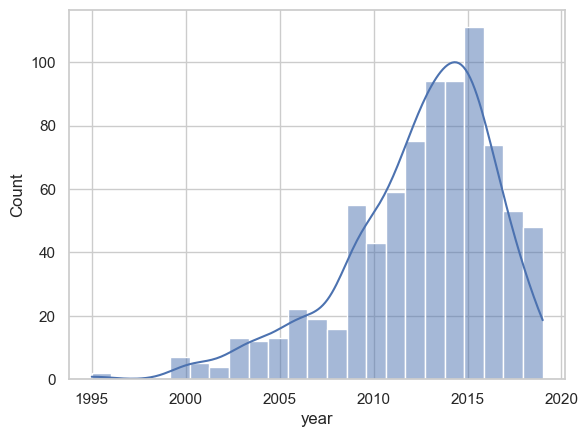

In [20]:
sns.histplot(data=df['year'],kde=True)

<Axes: xlabel='fuel_type', ylabel='count'>

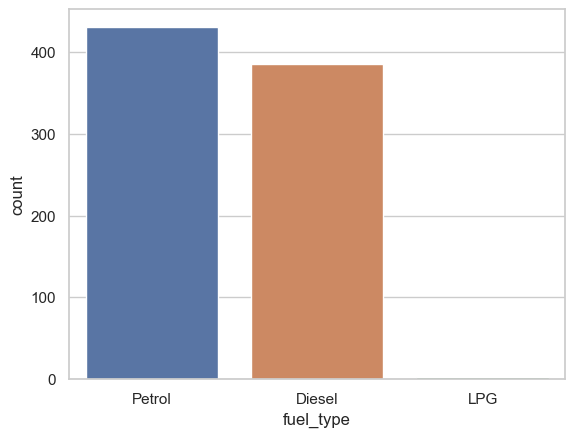

In [21]:
sns.countplot(x='fuel_type',data=df)

<Axes: xlabel='kms_driven', ylabel='Price'>

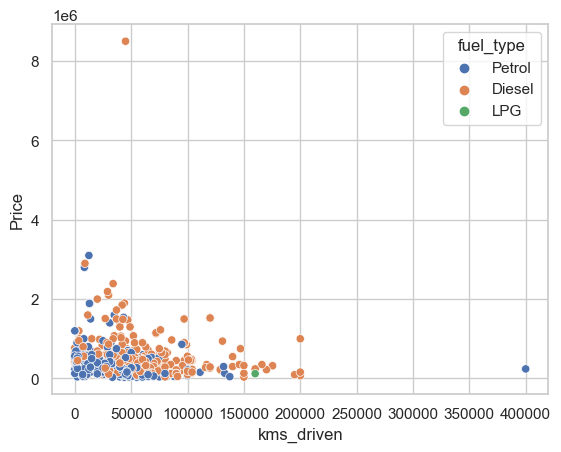

In [22]:
sns.scatterplot(x='kms_driven',y='Price',hue='fuel_type',data=df)

In [23]:
df['name']=df['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [24]:
df.reset_index(drop=True)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000.0,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000.0,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000.0,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000.0,36000,Diesel
4,Ford Figo,Ford,2012,175000.0,41000,Diesel
...,...,...,...,...,...,...
814,Toyota Corolla Altis,Toyota,2009,300000.0,132000,Petrol
815,Tata Zest XM,Tata,2018,260000.0,27000,Diesel
816,Mahindra Quanto C8,Mahindra,2013,390000.0,40000,Diesel
817,Honda Amaze 1.2,Honda,2014,180000.0,46250,Petrol


In [25]:
df=df[df['Price']<6e6].reset_index(drop=True)

In [26]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000.0,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000.0,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000.0,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000.0,36000,Diesel
4,Ford Figo,Ford,2012,175000.0,41000,Diesel
...,...,...,...,...,...,...
813,Toyota Corolla Altis,Toyota,2009,300000.0,132000,Petrol
814,Tata Zest XM,Tata,2018,260000.0,27000,Diesel
815,Mahindra Quanto C8,Mahindra,2013,390000.0,40000,Diesel
816,Honda Amaze 1.2,Honda,2014,180000.0,46250,Petrol


## Model Building

In [27]:
X=df.drop(columns='Price')
y=df['Price']

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from xgboost import XGBRegressor

In [29]:
numeric_feature=['year','kms_driven']
numeric_transformer=Pipeline(steps=[
    ('scalar',StandardScaler())
])


In [30]:
categorical=['name','company','fuel_type']
categorical_transformer=Pipeline(steps=[
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

In [31]:
model=LinearRegression()

In [32]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_feature),
        ('cat', categorical_transformer, categorical)
    ])


In [33]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

In [38]:
scores=[]
for i in  range (800):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    pipeline.fit(X_train, y_train)
    y_pred=pipeline.predict(X_test)
    scores.append(r2_score(y_test, y_pred))

In [39]:
np.argmax(scores)

652

In [40]:
scores[np.argmax(scores)]

0.9014345264477641

In [45]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=np.argmax(scores))

In [46]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  ['year', 'kms_driven']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('model', LinearRegression())])

In [47]:
y_pred=pipeline.predict(X_test)

In [48]:
r2_score(y_test, y_pred)

0.9014345264477641

## Pickle File

In [49]:
import pickle

In [51]:
pickle.dump(pipeline,open('LinearRegressionModel.pkl','wb'))

In [52]:
pipeline.predict(pd.DataFrame([['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']],columns=['name','company','year','kms_driven','fuel_type']))

array([415606.8933974])

In [53]:
df.to_csv('Cleaned_car.csv')